# Fall down Project
* share some images from https://www.kaggle.com/datasets/uttejkumarkandagatla/fall-detection-dataset/data
* https://heartbeat.comet.ml/custom-video-classification-using-yolov8-ec07a9de3b1a

1) tools
2) write your code
3) build model on images
4) use model (run inference)
5) explain model
6) apply model on videos

In [1]:
import ultralytics
#ultralytics.__version__

In [2]:
from ultralytics import YOLO, settings

In [3]:
# View all settings
print(settings)

# Return a specific setting
value = settings['runs_dir']

{'settings_version': '0.0.4', 'datasets_dir': '/home/dada/Barn/GQ/summer_CV/datasets', 'weights_dir': 'weights', 'runs_dir': 'runs', 'uuid': 'd9959e1ba9f67655c3e8534b33ec0b7dacd3f45a1b95ebfb6410c48d85b588eb', 'sync': True, 'api_key': '', 'openai_api_key': '', 'clearml': True, 'comet': True, 'dvc': True, 'hub': True, 'mlflow': True, 'neptune': True, 'raytune': True, 'tensorboard': True, 'wandb': True}


In [4]:
#set the current path as working path if the workign path is not current path
settings.reset() 

In [5]:
# View all settings
print(settings)

{'settings_version': '0.0.4', 'datasets_dir': '/home/dada/Barn/GQ/summer_CV/datasets', 'weights_dir': 'weights', 'runs_dir': 'runs', 'uuid': 'd9959e1ba9f67655c3e8534b33ec0b7dacd3f45a1b95ebfb6410c48d85b588eb', 'sync': True, 'api_key': '', 'openai_api_key': '', 'clearml': True, 'comet': True, 'dvc': True, 'hub': True, 'mlflow': True, 'neptune': True, 'raytune': True, 'tensorboard': True, 'wandb': True}


In [6]:
# For running inference on the TF-Hub module.
import tensorflow as tf

import tensorflow_hub as hub

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time, pickle
import requests
#from funcs import *

# Print Tensorflow version
print(tf.__version__)

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

import torch, torchvision

2024-05-12 10:31:00.247222: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 10:31:00.247262: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 10:31:00.247297: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.14.1
The following GPU devices are available: /device:GPU:0


# get coco data

In [7]:
#!wget https://ultralytics.com/assets/coco8-pose.zip #just 8 images, a small dataset 

In [56]:
#!unzip coco8-pose.zip

unzip:  cannot find or open coco-pose.zip, coco-pose.zip.zip or coco-pose.zip.ZIP.


# YOLO POSE 

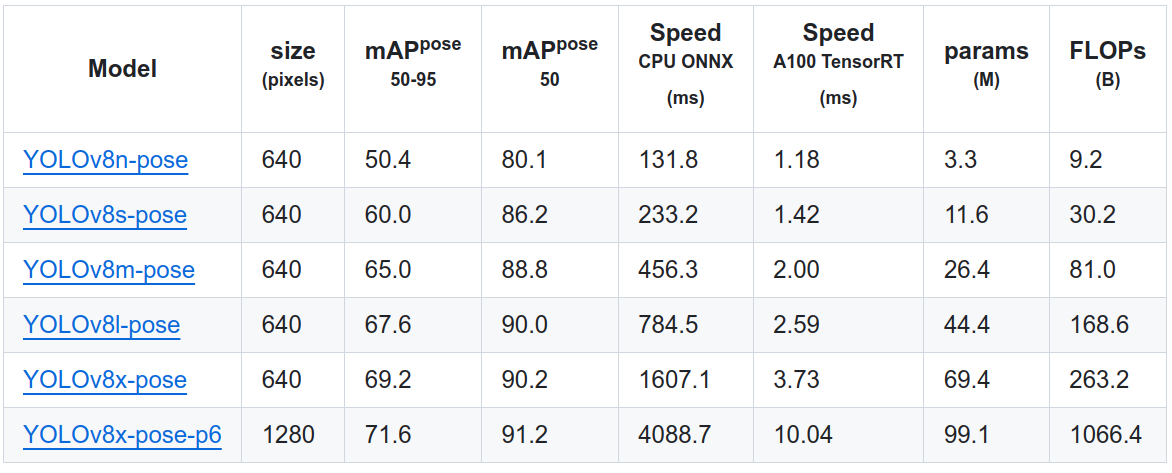

In [17]:
# Load a pretrained YOLOv8n-pose Pose model
pose_model = YOLO('yolov8n-pose.pt') #import yolov8n-pose.pt network

In [18]:
# Create a new YOLO model from scratch

'''default batch is 16, 
   training cycles : 10,
   set which GPU device to be used, in this case, I have a only 1 GPU RTX3080
'''

results = pose_model.train(data='coco8-pose.yaml', epochs=20, batch = 96, device=[0]) 

# #If using a MacOS, try device = "mps" 

New https://pypi.org/project/ultralytics/8.2.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.22 🚀 Python-3.11.5 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12035MiB)
engine/trainer: task=pose, mode=train, model=yolov8n-pose.pt, data=coco8-pose.yaml, epochs=20, time=None, patience=100, batch=96, imgsz=640, save=True, save_period=-1, cache=False, device=[0], workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, s

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home/dada/Barn/GQ/summer_CV/datasets/coco8-pose/labels/train.ca
val: Scanning /home/dada/Barn/GQ/summer_CV/datasets/coco8-pose/labels/val.cache.


Plotting labels to runs/pose/train15/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.00075), 72 bias(decay=0.0)


2024/05/05 09:59:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/05/05 09:59:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/05/05 09:59:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/05/05 09:59:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/05/05 09:59:29 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of transformers. If you encounter errors during autologging, try upgrading / downgrading transformers to a supported version, or try upgrading MLflow.
2024/05/05 09:59:29 INFO mlflow.tracking.fluent: Autologging successfully enabled for transformers.


MLflow: logging run_id(60027c1c7d30463dacd5b32f0670a12d) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/pose/train15
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.15G      1.034      2.675     0.3069     0.5678      1.341   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         14       0.92      0.929      0.907      0.684          1      0.625       0.69       0.37



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       2/20       2.1G      1.132      3.385     0.3102     0.8181      1.148   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         14      0.919      0.929      0.907      0.687          1      0.629      0.652      0.356



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.09G      1.353      3.046     0.4077      1.148      1.407   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         14      0.919      0.929      0.907      0.686          1      0.639      0.652      0.356



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.09G      1.407      3.944     0.5259      1.051      1.482   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         14      0.919      0.929      0.907      0.694      0.991      0.643      0.652      0.356



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.09G      1.326      2.742      0.356     0.9484      1.447   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         14      0.918      0.929      0.907      0.695      0.977      0.643      0.652      0.358



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.08G      1.281       4.37     0.4073      1.175      1.312   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         14      0.916      0.929      0.917      0.685      0.862      0.571      0.595       0.33



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.11G      0.707      2.475     0.4297     0.7931      1.128   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         14      0.925      0.929      0.927      0.696      0.626      0.643      0.584      0.312



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.11G     0.9378      2.403     0.3541     0.8275      1.229   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         14      0.809      0.857      0.892      0.673      0.854        0.5      0.571      0.295



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.11G      1.172      3.684     0.3884     0.8935      1.305   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         14      0.717      0.929      0.845      0.657       0.77        0.5      0.522      0.249



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.11G      1.348      2.165     0.3235      1.036      1.437   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         14      0.673      0.929      0.807      0.619      0.745        0.5      0.494      0.216


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.11G      1.204      3.187     0.3266      1.013      1.281   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         14      0.671      0.929      0.777      0.594      0.598        0.5      0.469      0.181



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.11G     0.8841      1.584     0.3339     0.5601      1.054   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         14      0.638      0.929      0.759      0.588      0.572        0.5      0.434      0.162



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.11G     0.9047      1.616      0.276     0.6931     0.9929   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         14      0.662      0.929       0.75      0.552      0.523        0.5      0.353      0.145



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.11G     0.9225      1.134     0.2986     0.5309      1.478   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         14      0.636      0.929      0.739      0.541      0.515        0.5      0.342      0.153



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.11G     0.6623      1.343     0.2762     0.4965     0.9554   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         14      0.647      0.918      0.712      0.518        0.5        0.5      0.316      0.138



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.11G     0.9159      1.434     0.2973     0.5708      1.211   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         14      0.704      0.714      0.721      0.498      0.497        0.5      0.322       0.14



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.11G      0.712      1.254     0.3322     0.4972     0.9676   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         14      0.703      0.714      0.736       0.51      0.493        0.5      0.354      0.164



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.11G     0.9055      2.172     0.2963     0.5658      1.233   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         14      0.704      0.714      0.742      0.516      0.428      0.429      0.309      0.156



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.11G     0.6612      1.115     0.3227     0.4951     0.9623   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         14      0.703      0.714      0.745      0.511      0.427      0.429      0.309      0.159



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.11G     0.8657      1.406     0.2692     0.5205      1.119   
                 Class     Images  Instances      Box(P          R      mAP50  m

                   all          4         14      0.616      0.786      0.715      0.523      0.542      0.357      0.326      0.169



20 epochs completed in 0.007 hours.
Optimizer stripped from runs/pose/train15/weights/last.pt, 6.8MB
Optimizer stripped from runs/pose/train15/weights/best.pt, 6.8MB

Validating runs/pose/train15/weights/best.pt...
Ultralytics YOLOv8.1.22 🚀 Python-3.11.5 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12035MiB)
YOLOv8n-pose summary (fused): 187 layers, 3289964 parameters, 0 gradients, 9.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m


                   all          4         14       0.92      0.929      0.907      0.684          1      0.624       0.69       0.37
Speed: 0.2ms preprocess, 1.8ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/pose/train15
MLflow: results logged to runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'


In [20]:
torch.save(pose_model.state_dict(), 'model/coco8_pose_model.pt')

In [ ]:
# Evaluate the model's performance on the validation set
val_results = pose_model.val()

In [ ]:
#1-bit precision 0/1
#2-bit precision -1/0/1
...
# 32-bit precision full precision

# Export to CPU

In [14]:
pose_model.export(format='onnx', device='cpu')  

Ultralytics YOLOv8.1.22 🚀 Python-3.11.5 torch-2.2.2+cu121 CPU (AMD Ryzen 5 4600G with Radeon Graphics)
<class 'ultralytics.nn.tasks.PoseModel'>

PyTorch: starting from 'runs/pose/train14/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 56, 8400) (6.5 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 0.8s, saved as 'runs/pose/train14/weights/best.onnx' (12.9 MB)

Export complete (2.6s)
Results saved to /home/dada/Barn/GQ/summer_CV/runs/pose/train14/weights
Predict:         yolo predict task=pose model=runs/pose/train14/weights/best.onnx imgsz=640  
Validate:        yolo val task=pose model=runs/pose/train14/weights/best.onnx imgsz=640 data=/home/dada/anaconda3/lib/python3.11/site-packages/ultralytics/cfg/datasets/coco8-pose.yaml  
Visualize:       https://netron.app


'runs/pose/train14/weights/best.onnx'

# Export to GPU

In [15]:
pose_model.export(format='onnx', device='cuda') 

Ultralytics YOLOv8.1.22 🚀 Python-3.11.5 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12035MiB)
<class 'ultralytics.nn.tasks.PoseModel'>

PyTorch: starting from 'runs/pose/train14/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 56, 8400) (6.5 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 0.6s, saved as 'runs/pose/train14/weights/best.onnx' (12.9 MB)

Export complete (0.7s)
Results saved to /home/dada/Barn/GQ/summer_CV/runs/pose/train14/weights
Predict:         yolo predict task=pose model=runs/pose/train14/weights/best.onnx imgsz=640  
Validate:        yolo val task=pose model=runs/pose/train14/weights/best.onnx imgsz=640 data=/home/dada/anaconda3/lib/python3.11/site-packages/ultralytics/cfg/datasets/coco8-pose.yaml  
Visualize:       https://netron.app


'runs/pose/train14/weights/best.onnx'

In [74]:
# import cv2
# # Load the exported ONNX model using OpenCV
# net = cv2.dnn.readNetFromONNX('./runs/pose/train4/weights/best_gpu.onnx')

In [16]:
#save to small model with half-precision fp
pose_model.export(format='onnx', half=False)

Ultralytics YOLOv8.1.22 🚀 Python-3.11.5 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12035MiB)
<class 'ultralytics.nn.tasks.PoseModel'>

PyTorch: starting from 'runs/pose/train14/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 56, 8400) (6.5 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 0.6s, saved as 'runs/pose/train14/weights/best.onnx' (12.9 MB)

Export complete (0.7s)
Results saved to /home/dada/Barn/GQ/summer_CV/runs/pose/train14/weights
Predict:         yolo predict task=pose model=runs/pose/train14/weights/best.onnx imgsz=640  
Validate:        yolo val task=pose model=runs/pose/train14/weights/best.onnx imgsz=640 data=/home/dada/anaconda3/lib/python3.11/site-packages/ultralytics/cfg/datasets/coco8-pose.yaml  
Visualize:       https://netron.app


'runs/pose/train14/weights/best.onnx'

In [20]:
# Perform object detection on an image using the model
# Run inference on 'bus.jpg' with arguments
pose_model.predict('./model/images.jpg', save=True, imgsz=320, conf=0.5)


image 1/1 /home/dada/Barn/GQ/summer_CV/model/images.jpg: 224x320 1 person, 150.2ms
Speed: 1.0ms preprocess, 150.2ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 320)
Results saved to runs/pose/train143


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'person'}
 obb: None
 orig_img: array([[[124, 130, 135],
         [ 86,  92,  97],
         [130, 134, 139],
         ...,
         [100, 100, 116],
         [ 95,  96, 110],
         [ 68,  69,  83]],
 
        [[102, 106, 111],
         [ 72,  76,  81],
         [109, 113, 118],
         ...,
         [103, 103, 119],
         [ 98,  99, 113],
         [ 74,  75,  89]],
 
        [[110, 113, 117],
         [ 90,  93,  97],
         [125, 128, 132],
         ...,
         [109, 110, 124],
         [103, 105, 116],
         [ 83,  85,  96]],
 
        ...,
 
        [[220, 215, 214],
         [220, 215, 214],
         [220, 215, 214],
         ...,
         [228, 223, 222],
         [228, 223, 222],
         [228, 223, 222]],
 
        [[218, 213, 212],
         [218, 213, 212],
         [219, 214,

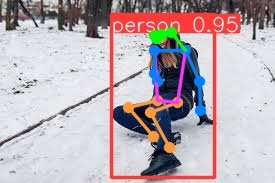

In [21]:
img = Image.open(r"./runs/pose/train143/images.jpg")
display(img)

# Object Classification

* https://github.com/ultralytics/ultralytics?tab=readme-ov-file
* video link https://youtu.be/5BO0Il_YYAg

In [4]:
# from ultralytics import YOLO

# # Load yolov8 nano model
# model = YOLO('yolov8n-cls.yaml')  # build a new model from YAML
# model = YOLO('yolov8n-cls.pt')  # load a pretrained model (recommended for training)
# model = YOLO('yolov8n-cls.yaml').load('yolov8n-cls.pt')  # build from YAML and transfer weights

In [7]:
# Load a pretrained extra large YOLOv8x-cls Classification model
model = YOLO('yolov8x-cls.yaml').load('yolov8x-cls.pt')
#model = YOLO('./data.yaml', task = "classify").load('yolov8n-cls.pt')

YOLOv8x-cls summary: 183 layers, 57422840 parameters, 57422840 gradients, 155.3 GFLOPs
Transferred 302/302 items from pretrained weights


In [23]:
tt_path = r"./falldown_data/pos/adult_10.jpg"

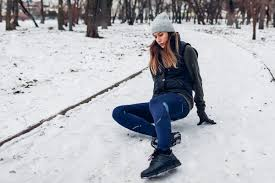

In [24]:
img = Image.open(tt_path)
display(img)

# Train a new Fall-down binary classification model

In [ ]:
# results = model.train(data='mnist160', epochs=100, imgsz=64)

In [12]:
import wandb
wandb.init() #force to re-login

In [8]:
model.train(data='./falldown_data/', epochs=10, imgsz=128, batch = 64, device = [0])

New https://pypi.org/project/ultralytics/8.2.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.22 🚀 Python-3.11.5 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12035MiB)
engine/trainer: task=classify, mode=train, model=yolov8x-cls.yaml, data=./falldown_data/, epochs=10, time=None, patience=100, batch=64, imgsz=128, save=True, save_period=-1, cache=False, device=[0], workers=8, project=None, name=train18, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fa

wandb: Currently logged in as: david-guo (utsa_dg). Use `wandb login --relogin` to force relogin


AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /home/dada/Barn/GQ/summer_CV/falldown_data/train... 465 images, 
val: Scanning /home/dada/Barn/GQ/summer_CV/falldown_data/test... 123 images, 0 c


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)


2024/05/05 09:45:55 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/05/05 09:45:55 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2024/05/05 09:45:55 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of transformers. If you encounter errors during autologging, try upgrading / downgrading transformers to a supported version, or try upgrading MLflow.
2024/05/05 09:45:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/05/05 09:45:58 INFO mlflow.tracking.fluent: Autologging successfully enabled for transformers.


MLflow: logging run_id(534de18f786a47549818b511415fec05) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ✅
Image sizes 128 train, 128 val
Using 8 dataloader workers
Logging results to runs/classify/train18
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/10      2.52G     0.7065         17        128: 100%|██████████| 8/8 [0
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,

                   all      0.561          1



      Epoch    GPU_mem       loss  Instances       Size


       2/10      2.61G      0.619         17        128: 100%|██████████| 8/8 [0
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,

                   all      0.854          1



      Epoch    GPU_mem       loss  Instances       Size


       3/10      2.59G     0.4701         17        128: 100%|██████████| 8/8 [0
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,

                   all      0.894          1



      Epoch    GPU_mem       loss  Instances       Size


       4/10      2.41G     0.3509         17        128: 100%|██████████| 8/8 [0
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,

                   all      0.919          1



      Epoch    GPU_mem       loss  Instances       Size


       5/10      2.54G     0.2423         17        128: 100%|██████████| 8/8 [0
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,

                   all      0.951          1



      Epoch    GPU_mem       loss  Instances       Size


       6/10      2.59G     0.1662         17        128: 100%|██████████| 8/8 [0
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,

                   all      0.943          1



      Epoch    GPU_mem       loss  Instances       Size


       7/10      2.59G     0.1287         17        128: 100%|██████████| 8/8 [0
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,

                   all      0.951          1



      Epoch    GPU_mem       loss  Instances       Size


       8/10      2.41G    0.09829         17        128: 100%|██████████| 8/8 [0
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,

                   all      0.935          1



      Epoch    GPU_mem       loss  Instances       Size


       9/10      2.58G     0.1219         17        128: 100%|██████████| 8/8 [0
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,

                   all      0.951          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      2.39G    0.06936         17        128: 100%|██████████| 8/8 [0
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,

                   all      0.943          1



10 epochs completed in 0.042 hours.
Optimizer stripped from runs/classify/train18/weights/last.pt, 112.5MB
Optimizer stripped from runs/classify/train18/weights/best.pt, 112.5MB

Validating runs/classify/train18/weights/best.pt...
Ultralytics YOLOv8.1.22 🚀 Python-3.11.5 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12035MiB)
YOLOv8x-cls summary (fused): 133 layers, 56125762 parameters, 0 gradients, 153.8 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /home/dada/Barn/GQ/summer_CV/falldown_data/train... found 465 images in 2 classes ✅ 
val: None...
test: /home/dada/Barn/GQ/summer_CV/falldown_data/test... found 123 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,
2024/05/05 09:48:37 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


                   all      0.951          1
Speed: 0.0ms preprocess, 0.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train18
Results saved to runs/classify/train18
MLflow: results logged to runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x76ed991dc290>
curves: []
curves_results: []
fitness: 0.9756097197532654
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9512194991111755, 'metrics/accuracy_top5': 0.9999999403953552, 'fitness': 0.9756097197532654}
save_dir: PosixPath('runs/classify/train18')
speed: {'preprocess': 0.018466778886996632, 'inference': 0.22738929686507559, 'loss': 5.0397423224720534e-05, 'postprocess': 4.264397349784045e-05}
task: 'classify'
top1: 0.9512194991111755
top5: 0.9999999403953552

In [9]:
#test classification on an image
results = model("./falldown_data/test/neg/image_12.jpg")


image 1/1 /home/dada/Barn/GQ/summer_CV/falldown_data/test/neg/image_12.jpg: 128x128 neg 1.00, pos 0.00, 4.6ms
Speed: 56.9ms preprocess, 4.6ms inference, 0.1ms postprocess per image at shape (1, 3, 128, 128)


In [10]:
probs = list(results[0].probs.data)
classes = results[0].names
highest_prob = max(probs)
highest_prob_index = probs.index(highest_prob)
print(f"Class: {classes[highest_prob_index]}") 

Class: neg


In [36]:
#use cli to run prediciton
!yolo task=pose mode=predict model=./runs/pose/train15/weights/best.pt conf=0.25 source=./falldown_data/test/neg/image_12.jpg

Ultralytics YOLOv8.1.22 🚀 Python-3.11.5 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12035MiB)
YOLOv8n-pose summary (fused): 187 layers, 3289964 parameters, 0 gradients, 9.2 GFLOPs

image 1/1 /home/dada/Barn/GQ/summer_CV/falldown_data/test/neg/image_12.jpg: 448x640 1 person, 105.8ms
Speed: 4.6ms preprocess, 105.8ms inference, 155.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/pose/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


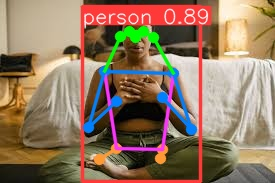

In [37]:
img = Image.open(r"./runs/pose/predict/image_12.jpg")
display(img)

In [11]:
from PIL import Image
from IPython.display import display

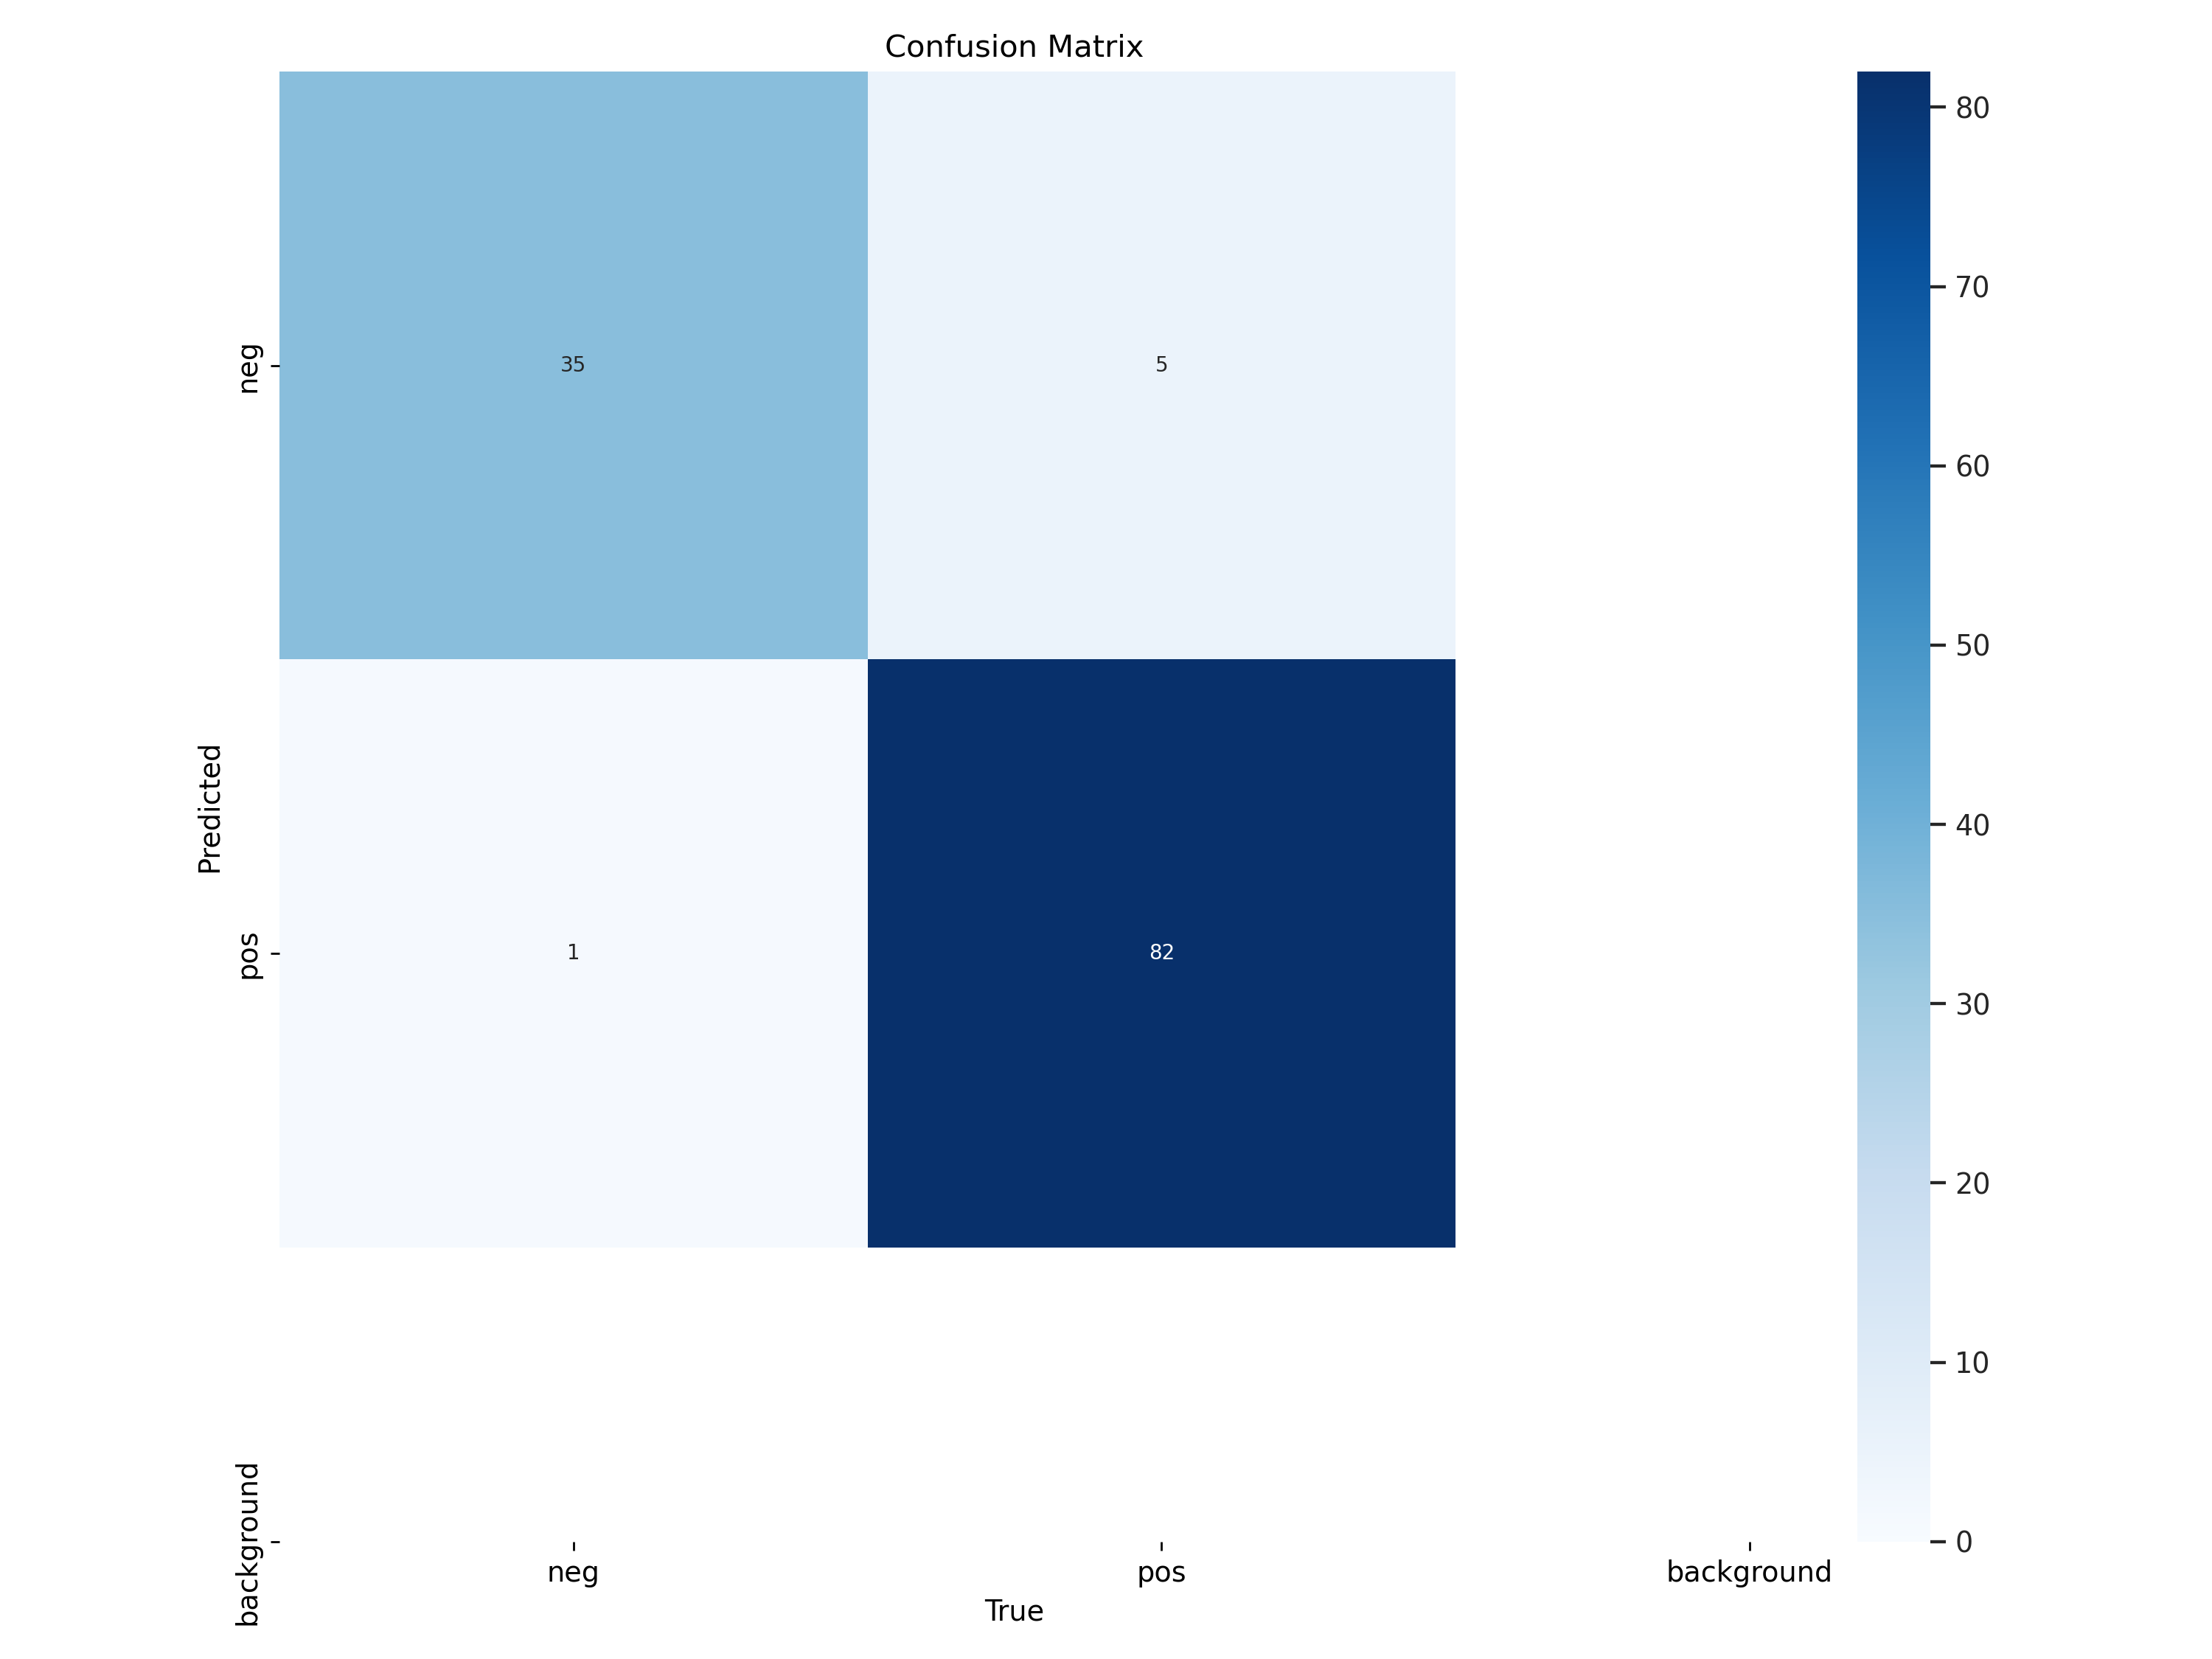

In [13]:
cm_img_new = Image.open(r"./runs/classify/train18/confusion_matrix.png")
display(cm_img_new)

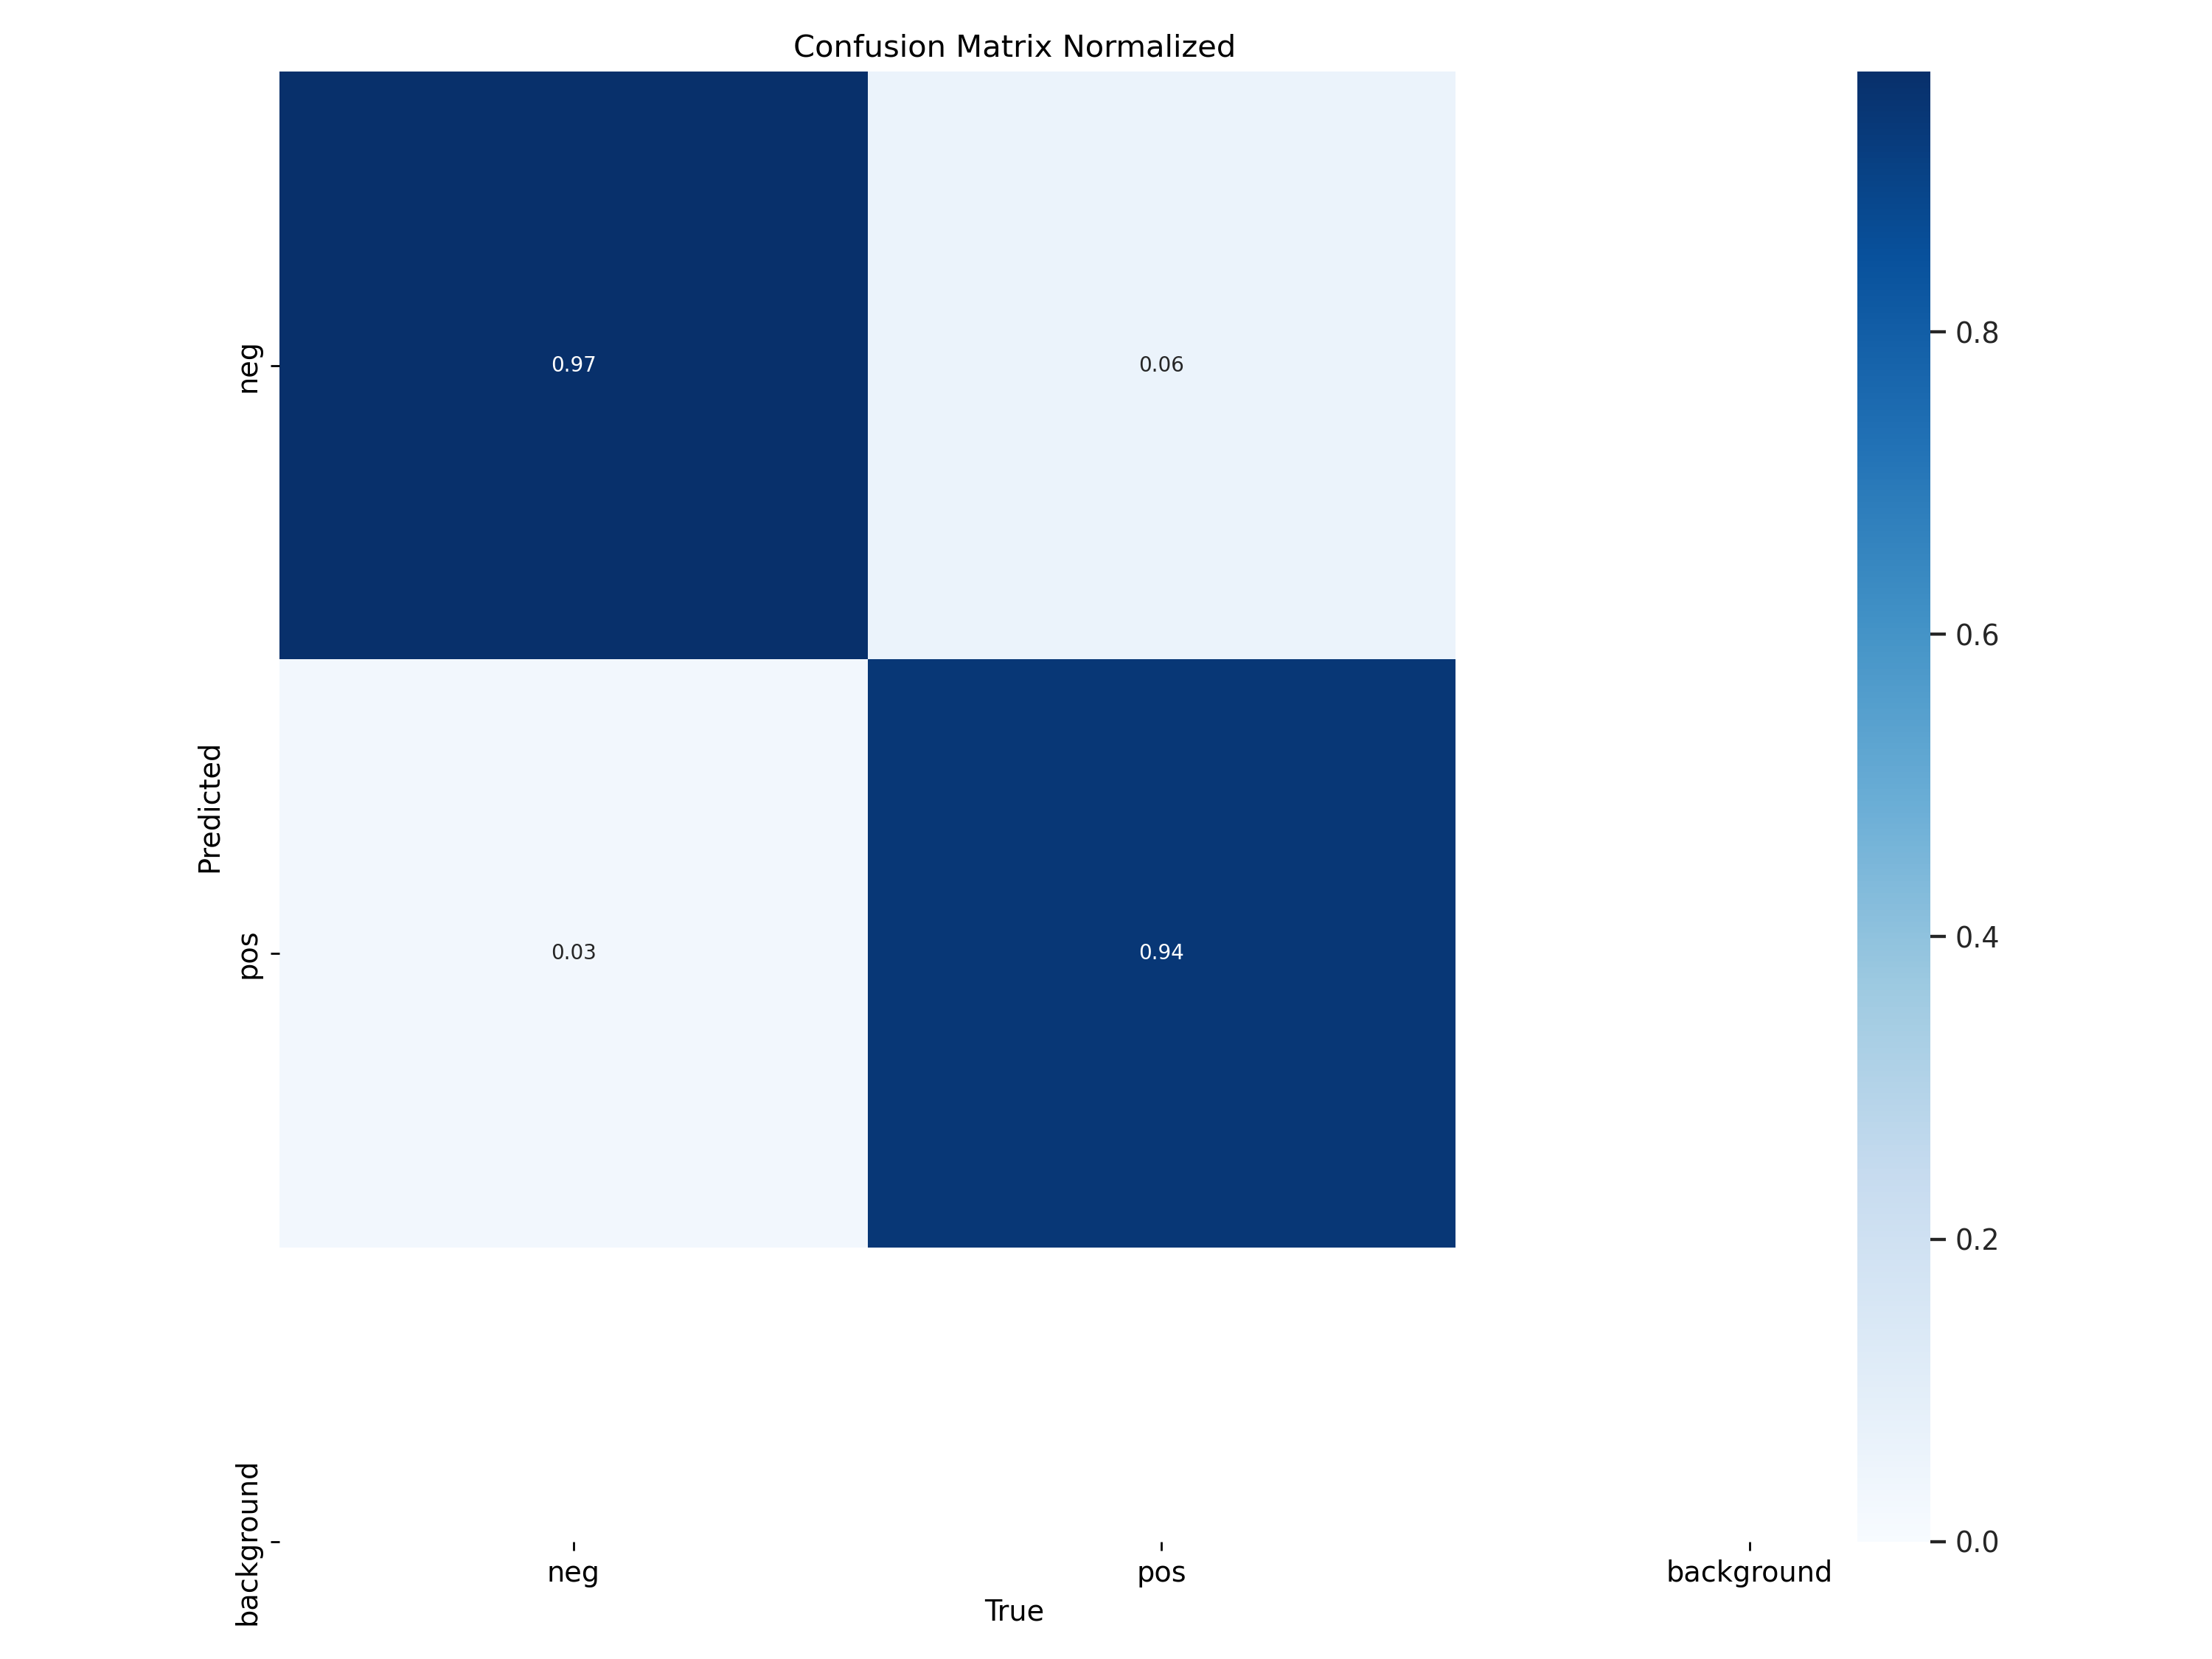

In [44]:
cm_norm_img_new = Image.open(r"./runs/classify/train18/confusion_matrix_normalized.png")
display(cm_norm_img_new)

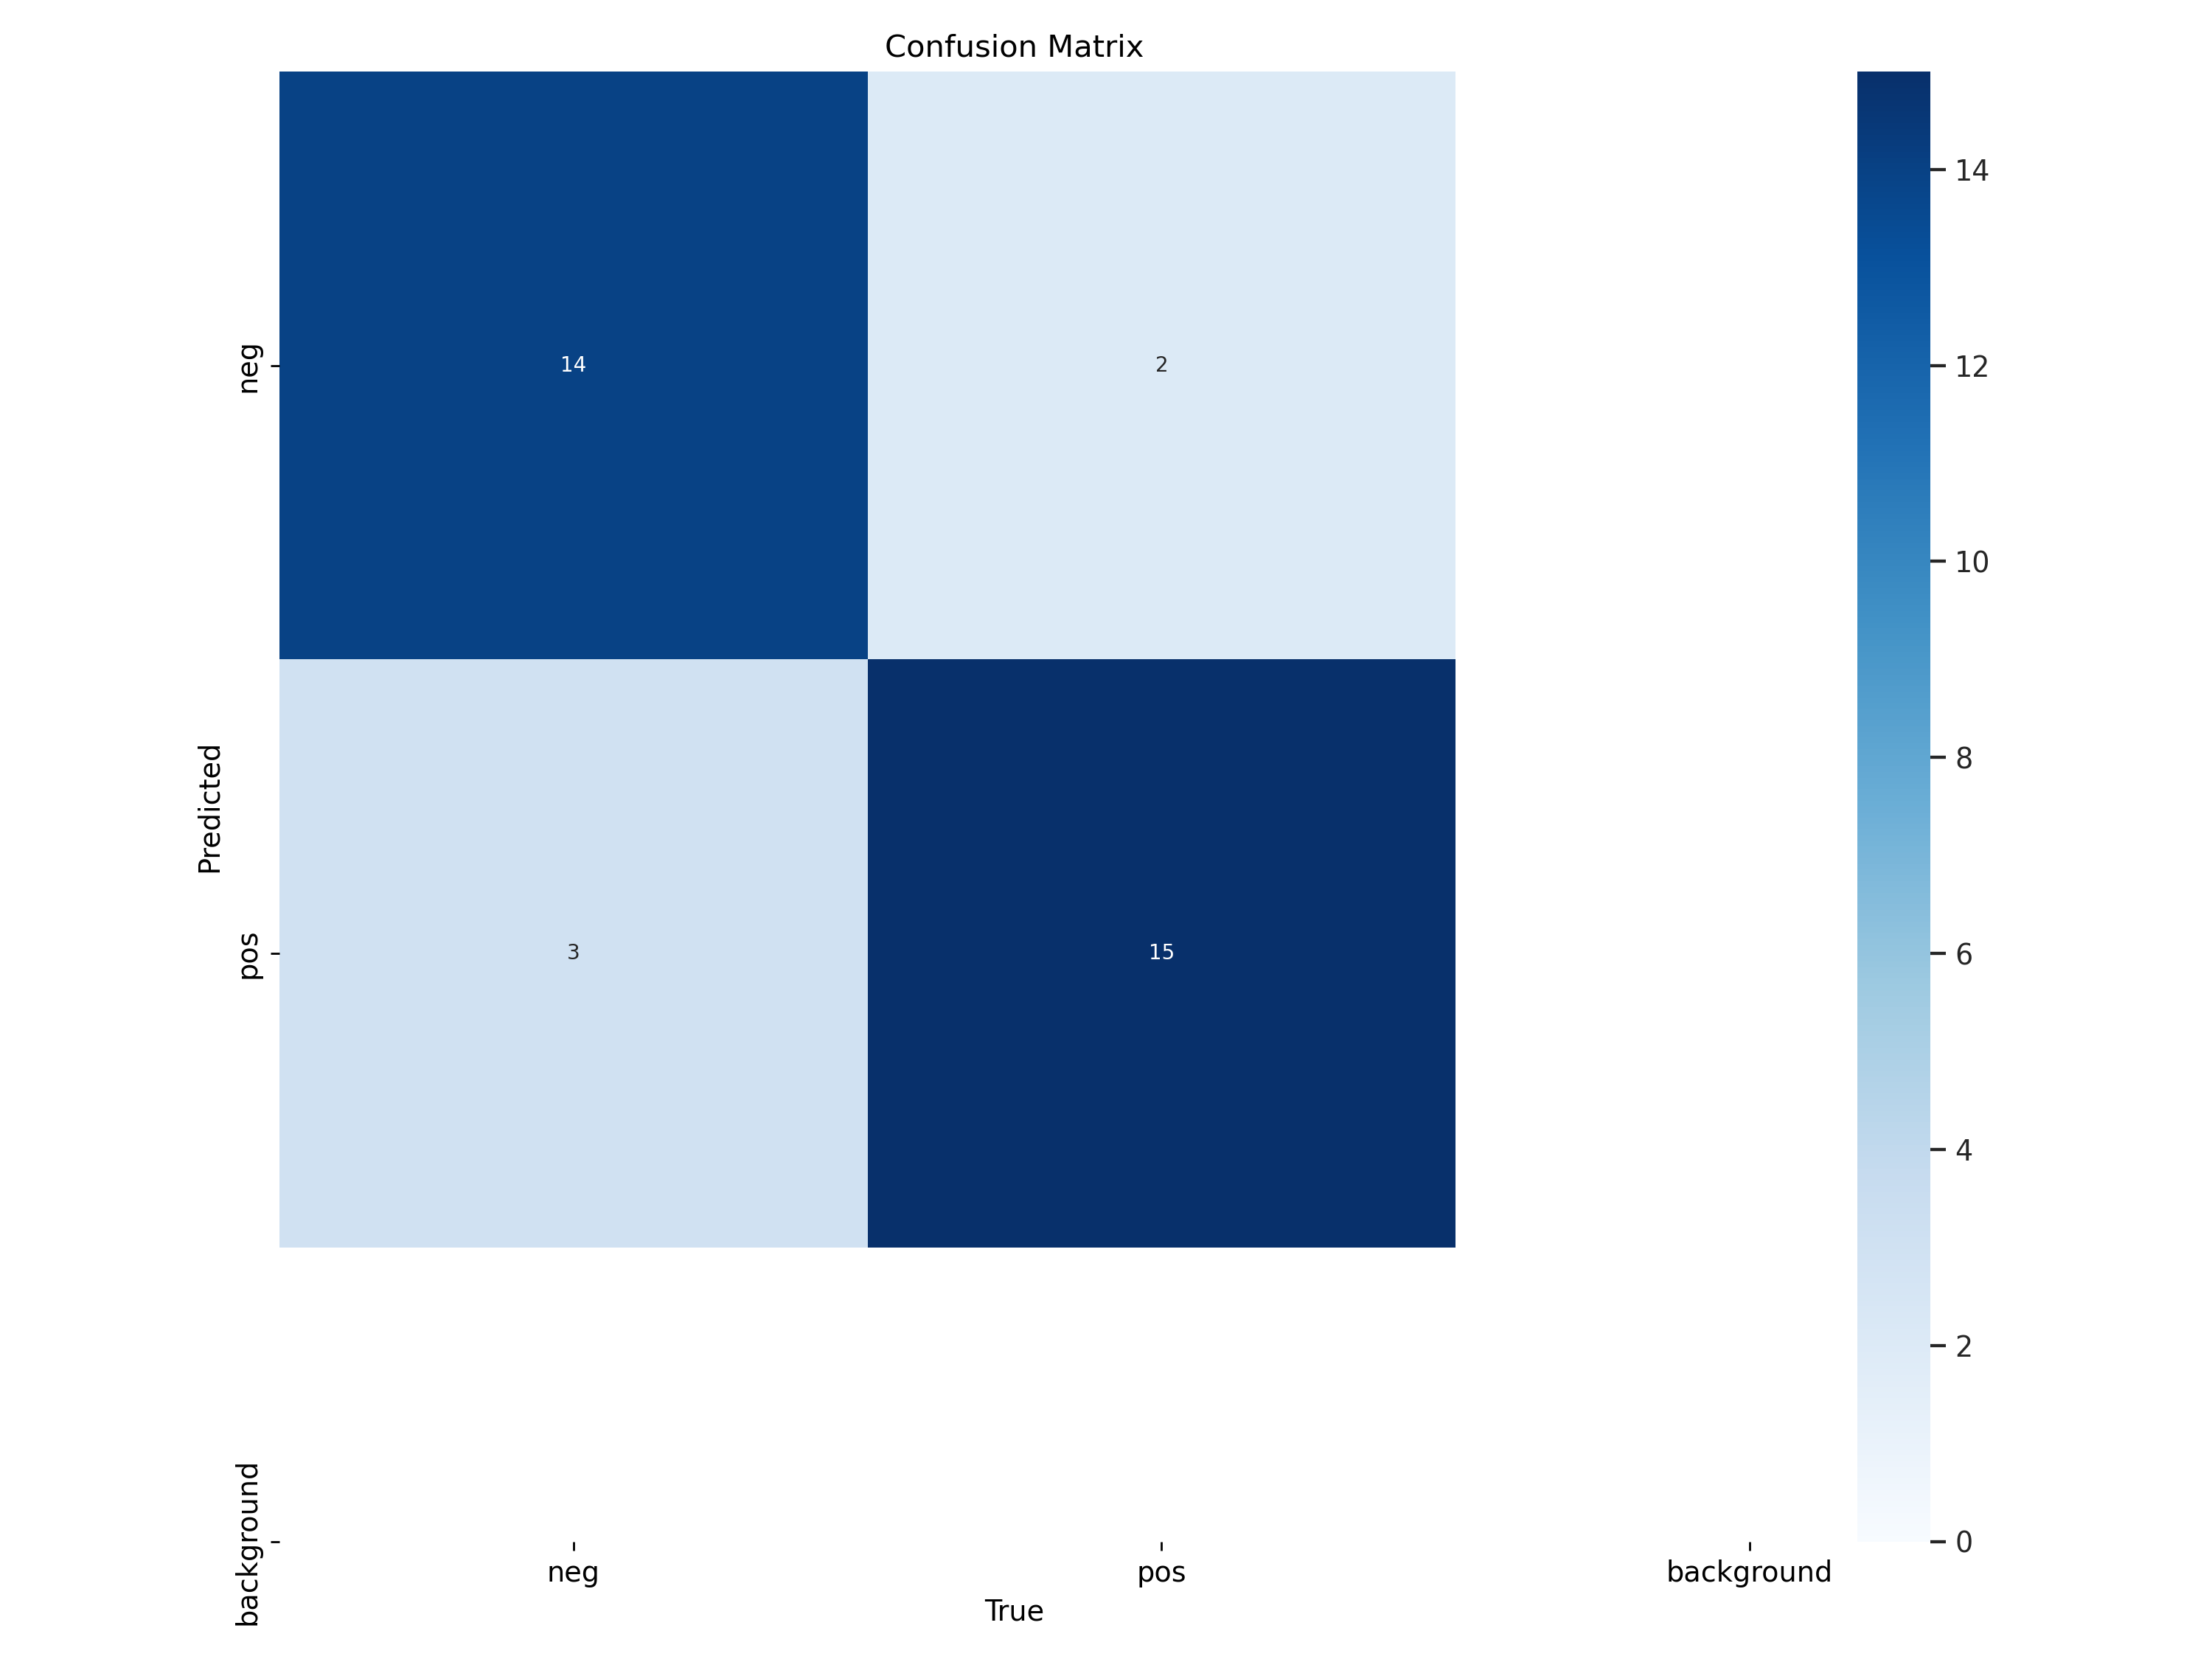

In [45]:
cm_norm_img = Image.open(r"./runs/classify/train9/confusion_matrix.png")
display(cm_norm_img)

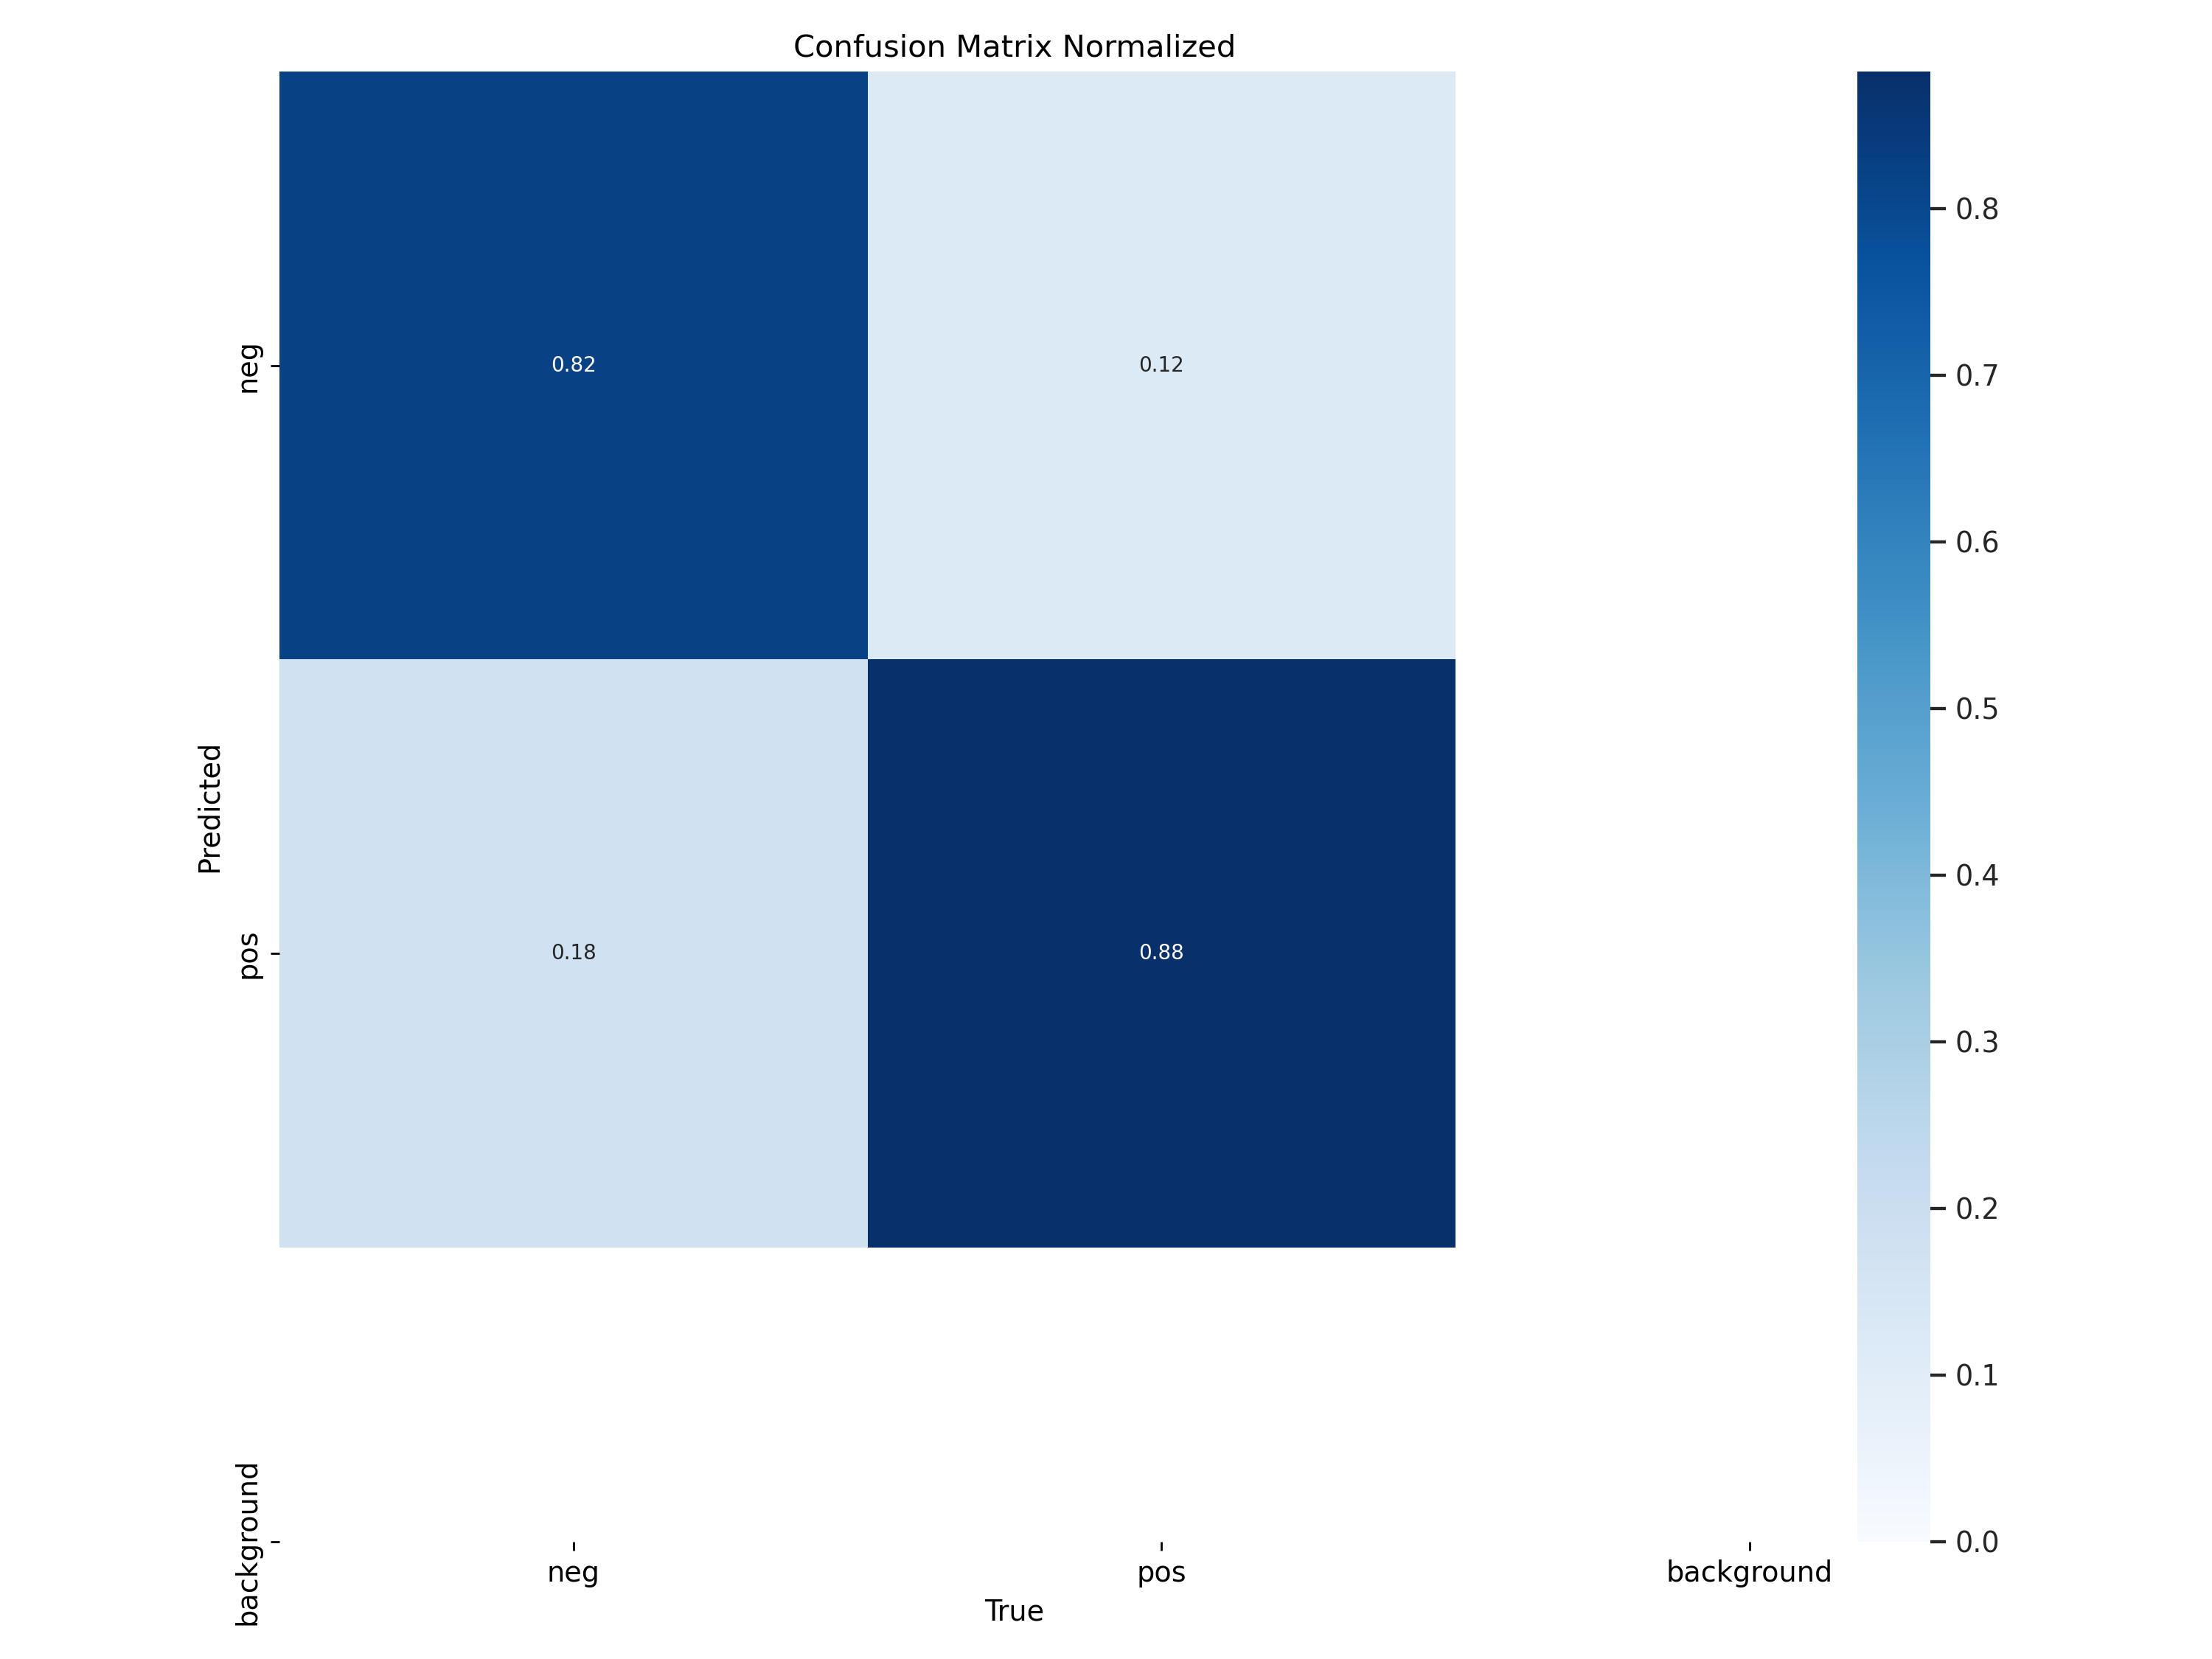

In [38]:
cm_norm_img = Image.open(r"./runs/classify/train9/confusion_matrix_normalized.png")
display(cm_norm_img)

# TF_Hub module for falldown classification

In [45]:
pip install tensorflow_hub

  Obtaining dependency information for tensorflow_hub from https://files.pythonhosted.org/packages/30/78/9d5292a2b616901bdb075bbf0c777b293f4140bb48108ac2b33fd716c2eb/tensorflow_hub-0.14.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.3/90.3 kB 890.2 kB/s eta 0:00:00B/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [54]:
#pip install onnx onnxruntime onnxsim onnx-tf

In [55]:
#pip install tensorflow tensorflow_probability

In [ ]:
#model = YOLO('./runs/detect/train6/weights/best.pt') 

In [13]:
# # Export the model to ONNX format
# model.export(format='onnx')

In [ ]:
#!onnx-tf convert -i ./runs/detect/train6/weights/best.onnx -o ./tfmodel/coco_box

# tracking video
* https://roboflow.com/video-inference/yolov8

In [50]:
#pip install supervision -q

In [52]:
pip install pytube -q

Note: you may need to restart the kernel to use updated packages.


In [57]:
from pytube import YouTube
from pytube.innertube import _default_clients

_default_clients["ANDROID_MUSIC"] = _default_clients["ANDROID_CREATOR"]

In [58]:
YouTube('https://www.youtube.com/watch?v=XbJ8J95iXb0').streams.first().download()

'/home/dada/Barn/GQ/summer_CV/Old People Being Clumsy For 8 Minutes Straight 😂.mp4'

In [77]:
from IPython.display import Video

VIDEO_PATH = "./video_input/youtube_spl_video.mp4"
Video(VIDEO_PATH)

# Create a Video Processing Callback

In [60]:
import supervision as sv

In [66]:
def process_frame(frame: np.ndarray, _) -> np.ndarray:
    results = model(frame, imgsz=1280)[0]
    
    #detections = sv.Detections.from_yolov8(results)
    #box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)

    #labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, _ in detections]
    frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)

    return frame

In [67]:
#sv.process_video(source_path=VIDEO_PATH, target_path=f"result.mp4", callback=process_frame)

# extract frames from video

In [47]:
import cv2
import os

def extract_frames(video_path, output_dir, num_frames=16):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video
    num_frames_total = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the step size for the sliding window based on the desired number of frames
    step_size = max(num_frames_total // num_frames, 1)

    # Initialize the current frame number and the frame counter
    frame_num = 0
    count = 0

    # Loop through the video frames and extract a frame every step_size frames
    while True:
        # Read the current frame
        ret, frame = cap.read()

        # If we've reached the end of the video, break out of the loop
        if not ret:
            break

        # If the current frame number is a multiple of the step size, save the frame
        if frame_num % step_size == 0:
            # Construct the output filename
            output_path = os.path.join(output_dir, f'frame_{count:04d}.jpg')

            # Save the frame to disk
            cv2.imwrite(output_path, frame)

            # Increment the frame counter
            count += 1

        # Increment the current frame number
        frame_num += 1

    # Release the video file
    cap.release()

    # Return the total number of frames extracted
    return count


In [69]:
# Define the input and output directories
input_dir = './video_input'
output_dir = './video_frames'

In [70]:
# Number of frames to extract from each video
num_frames = 48

# Loop through all video files in the input directory
for filename in os.listdir(input_dir):
    if filename.endswith('.mp4') or filename.endswith('.avi'):
        # Path to input and output files
        input_file = os.path.join(input_dir, filename)
        output_file = os.path.join(output_dir, os.path.splitext(filename)[0])

        # Create the output directory if it doesn't exist
        if not os.path.exists(output_file):
            os.makedirs(output_file)

        # Extract frames from the video file
        extract_frames(input_file, output_file, num_frames)

        print(f'{num_frames} frames extracted from {input_file} and saved to {output_file}')

48 frames extracted from ./video_input/youtube_spl_video.mp4 and saved to ./video_frames/youtube_spl_video


# Extract and resize frames

In [71]:
from PIL import Image
import os
import uuid

# Set the paths for the input and output directories
input_dir = "./video_frames/youtube_spl_video"
output_dir = "./frames_resize"

assert os.path.exists(output_dir)

print(f"{len(os.listdir(input_dir))} images to be resized")
# Loop through all the subdirectories of the input directory
for filename in os.listdir(input_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Open the image and resize it to 64x64
        image_path = os.path.join(input_dir, filename)
        image = Image.open(image_path)
        resized_image = image.resize((256, 256))

        # Generate a unique filename and save the resized image to the output directory
        unique_filename = str(uuid.uuid4()) + ".jpg"
        output_path = os.path.join(output_dir, unique_filename)
        resized_image.save(output_path)      


49 images to be resized
50 images have been resized


In [72]:
print(f"{len(os.listdir(output_dir))} images have been resized")

49 images have been resized


In [73]:
!yolo task=classify mode=predict model=./runs/classify/train18/weights/best.pt conf=0.25 source=./frames_resize

Ultralytics YOLOv8.1.22 🚀 Python-3.11.5 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3080, 12035MiB)
YOLOv8x-cls summary (fused): 133 layers, 56125762 parameters, 0 gradients, 153.8 GFLOPs

image 1/49 /home/dada/Barn/GQ/summer_CV/frames_resize/02bdd6a4-0d32-45b4-ad5d-96918302d823.jpg: 128x128 pos 0.53, neg 0.47, 3.5ms
image 2/49 /home/dada/Barn/GQ/summer_CV/frames_resize/03c788fc-c739-499c-b46c-9976a977f77a.jpg: 128x128 neg 0.61, pos 0.39, 3.9ms
image 3/49 /home/dada/Barn/GQ/summer_CV/frames_resize/08e0da5b-a53a-4d28-bacc-c463e3a0a452.jpg: 128x128 neg 0.72, pos 0.28, 3.6ms
image 4/49 /home/dada/Barn/GQ/summer_CV/frames_resize/08e1591b-c7a1-4daa-a653-c3a2db2789b3.jpg: 128x128 neg 0.93, pos 0.07, 5.3ms
image 5/49 /home/dada/Barn/GQ/summer_CV/frames_resize/0c0ce6a9-70cb-4455-a61e-f67f46cbf7f0.jpg: 128x128 neg 0.82, pos 0.18, 3.8ms
image 6/49 /home/dada/Barn/GQ/summer_CV/frames_resize/10972607-c87c-47d3-9efb-4e2a70dde0f4.jpg: 128x128 neg 0.57, pos 0.43, 3.7ms
image 7/49 /home/dada/Barn/GQ/

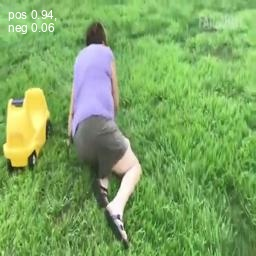

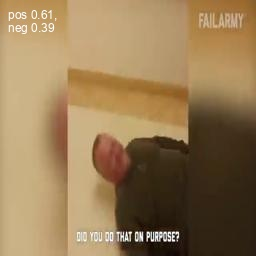

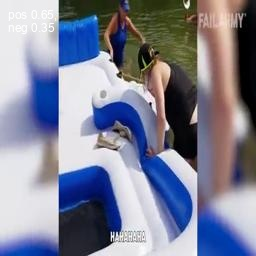

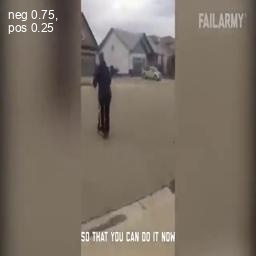

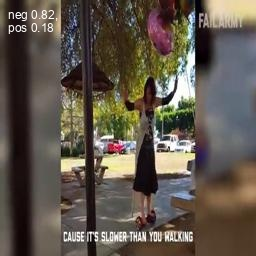

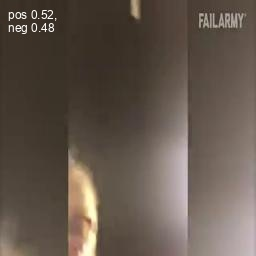

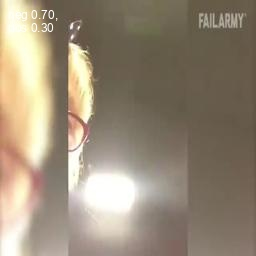

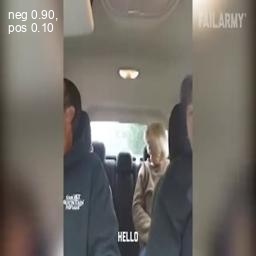

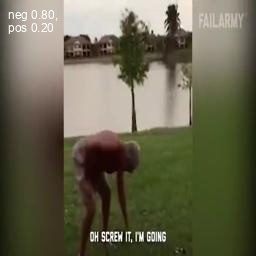

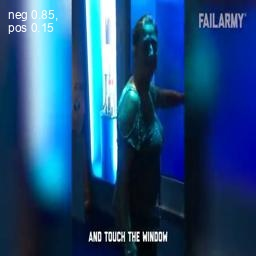

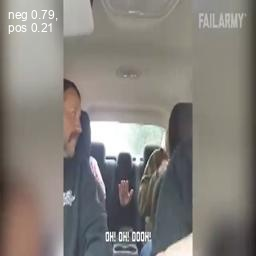

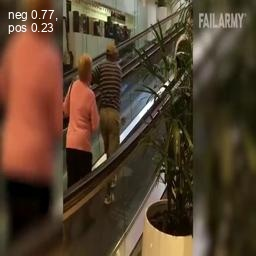

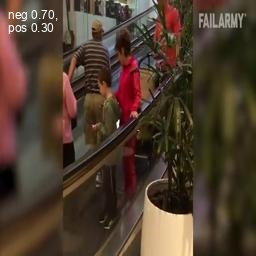

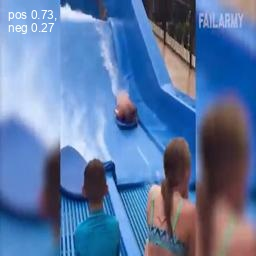

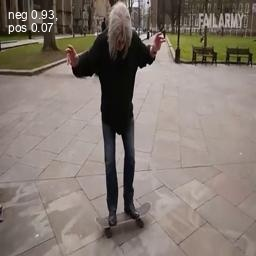

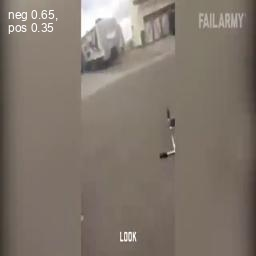

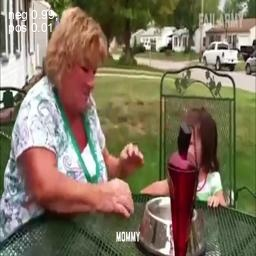

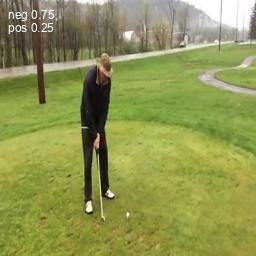

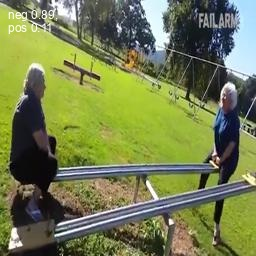

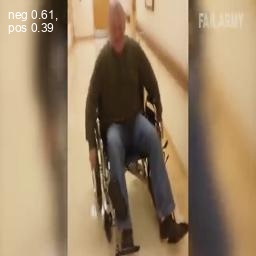

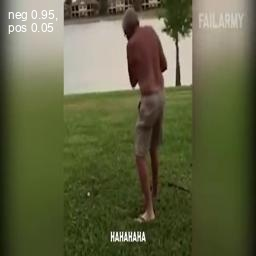

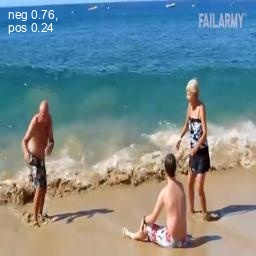

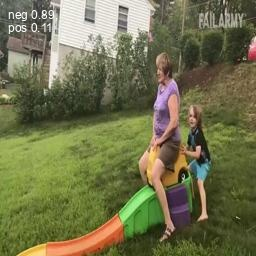

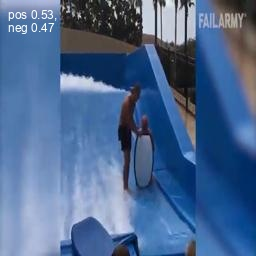

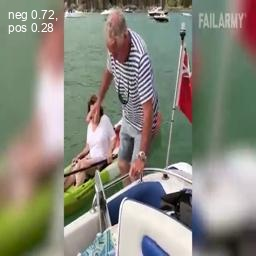

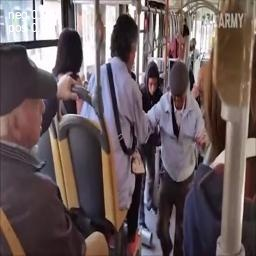

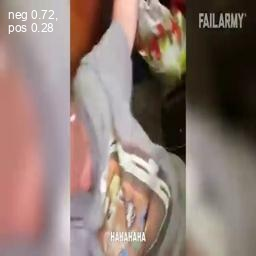

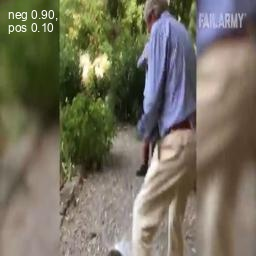

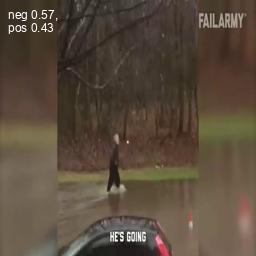

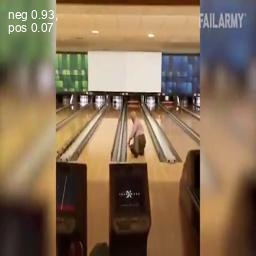

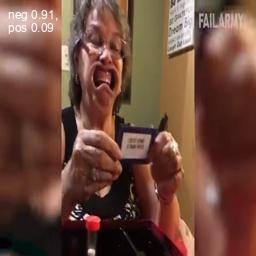

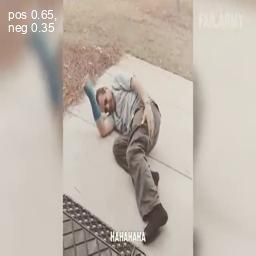

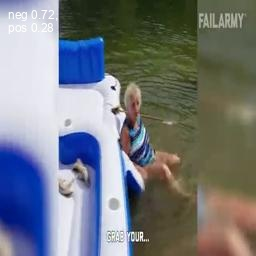

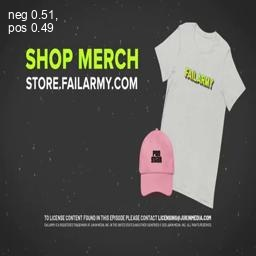

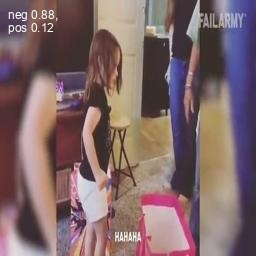

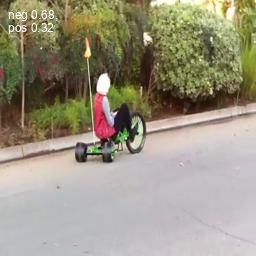

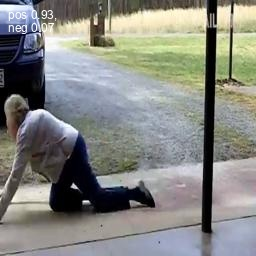

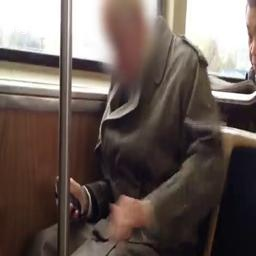

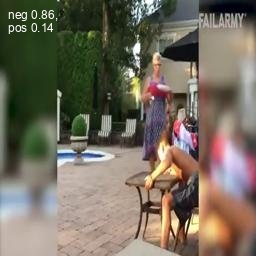

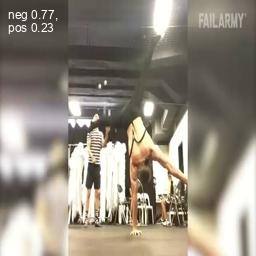

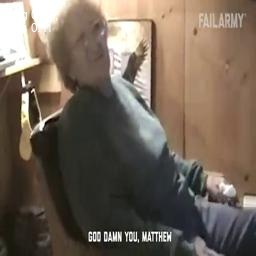

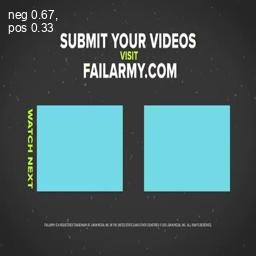

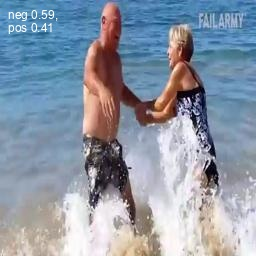

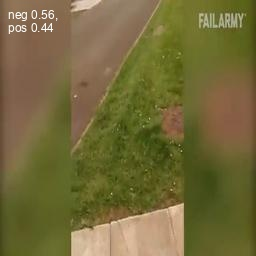

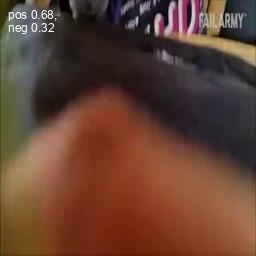

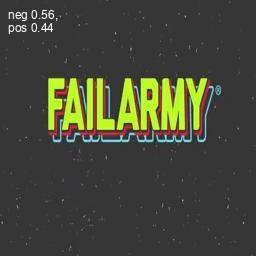

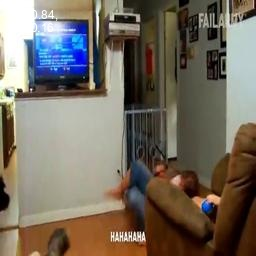

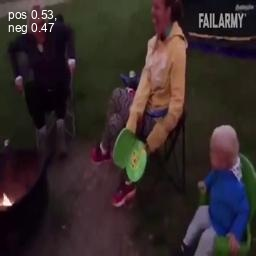

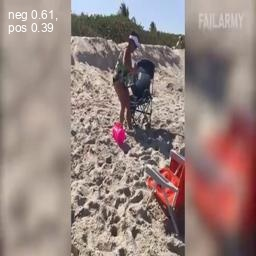

In [74]:
for i in os.listdir("./runs/classify/predict2"):
    img = Image.open(f"./runs/classify/predict2/{i}")
    display(img)

# video classification - based falldown probabilities on frames

In [75]:
import gradio as gr
import cv2
import numpy as np
from ultralytics import YOLO
from timeit import default_timer as timer
import os

# returning classifiers output
def video_classifier(inp):
    model = YOLO("./runs/classify/train18/weights/best.pt")

    result = model.predict(source=inp)
    probs = result[0].probs
    max_tensor = max(probs) #get max prob for falldown
    tensor_pos = ((probs == max_tensor).nonzero(as_tuple=True)[0])

    return format.get(int(tensor_pos))

# deploy the model on gradio

In [ ]:
# gradio code block for input and output
with gr.Blocks() as app:
    gr.Markdown("## Video classification using Yolov8")
    with gr.Row():
        inp_video = gr.Video()
        out_txt = gr.Textbox()
    btn = gr.Button(value="Submit")
    btn.click(video_classifier, inputs=inp_video, outputs=out_txt)

app.launch()